In [1]:
import pandas as pd
import sqlite3
import sqlalchemy

In [2]:
def create_connection(db_file):
    """ 
    create a database connection to the SQLite database
    specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [3]:
conn = create_connection('cloudy_with_a_chance_of_football.db')

In [4]:
#pd.read_csv('../cleaned_data/').to_sql(table_name, conn, if_exists='append', index=False)

In [5]:
cursorObj = conn.cursor()

In [87]:
cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

In [88]:
print(cursorObj.fetchall())

[('positions',), ('player_dob',)]


In [11]:
datapros_cleaner = pd.read_csv('../cleaned_data/datapros_cleaner.csv')

In [12]:
datapros_cleaner.head()

,Unnamed: 0,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130


In [13]:
datapros_cleaner.shape

(2577, 10)

In [16]:
datapros_cleaner = datapros_cleaner.drop('Unnamed: 0', axis = 1)

In [17]:
nflsavant_2019_cleaned = pd.read_csv('../cleaned_data/nflsavant_2019_cleaned.csv')

In [18]:
nflsavant_2019_cleaned

,Unnamed: 0,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,0,2019122201,2019-12-22,4,1,40,LAC,LV,3,9,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
1,1,2019122201,2019-12-22,4,1,47,LAC,LV,2,9,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
2,2,2019122201,2019-12-22,4,1,51,LAC,LV,1,9,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
3,3,2019122201,2019-12-22,4,1,57,LAC,LV,2,2,...,0,0,NaN,14,OPP,1,OAK,1,DEFENSIVE OFFSIDE,5
4,4,2019122201,2019-12-22,4,2,3,LAC,LV,1,10,...,0,0,NaN,22,OPP,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39073,42167,2019090900,2019-09-09,2,14,19,HOU,NO,4,1,...,0,0,LEFT END,21,OPP,0,NaN,0,NaN,0
39074,42175,2019090809,2019-09-08,1,4,56,ARI,DET,4,1,...,0,0,NaN,43,OWN,0,NaN,0,NaN,0
39075,42182,2019090803,2019-09-08,3,7,54,BAL,MIA,0,0,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0
39076,42184,2019090500,2019-09-05,3,15,0,GB,CHI,0,0,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0


In [20]:
red_zone_2019 = pd.read_csv('../cleaned_data/2019RedZoneStats_cleaned.csv')

In [33]:
red_zone_2019['week_id'] = red_zone_2019['Season'].astype(str) + '_' + red_zone_2019['Week'].astype(str)

In [35]:
red_zone_2019['week_id'].unique()

array(['2019_7', '2019_5', '2019_15', '2019_4', '2019_8', '2019_12',
       '2019_3', '2019_13', '2019_14', '2019_10', '2019_9', '2019_17',
       '2019_6', '2019_1', '2019_16', '2019_2', '2019_11'], dtype=object)

In [36]:
red_zone_2020 = pd.read_csv('../cleaned_data/2020RedZoneStats_cleaned.csv')

In [37]:
red_zone_2020['week_id'] = red_zone_2020['Season'].astype(str) + '_' + red_zone_2020['Week'].astype(str)

In [38]:
red_zone_2020['week_id'].unique()

array(['2020_16', '2020_3', '2020_2', '2020_8', '2020_15', '2020_10',
       '2020_7', '2020_5', '2020_12', '2020_1', '2020_6', '2020_9',
       '2020_4', '2020_14', '2020_17', '2020_13', '2020_11'], dtype=object)

In [44]:
list(red_zone_2019)

['PlayerID',
 'Name',
 'Team',
 'Position',
 'Week',
 'OpponentRZ',
 'PassingYardsRZ',
 'PassingTouchdownsRZ',
 'PassingInterceptionsRZ',
 'RushingYardsRZ',
 'RushingTouchdownsRZ',
 'ReceptionsRZ',
 'ReceivingYardsRZ',
 'ReceivingTouchdownsRZ',
 'SacksRZ',
 'InterceptionsRZ',
 'FumblesForcedRZ',
 'FumlbesRecoveredRZ',
 'FantasyPointsRZ',
 'Season',
 'week_id']

In [43]:
list(red_zone_2020)

['PlayerID',
 'Name',
 'Team',
 'Position',
 'Week',
 'OpponentRZ',
 'PassingYardsRZ',
 'PassingTouchdownsRZ',
 'PassingInterceptionsRZ',
 'RushingYardsRZ',
 'RushingTouchdownsRZ',
 'ReceptionsRZ',
 'ReceivingYardsRZ',
 'ReceivingTouchdownsRZ',
 'SacksRZ',
 'InterceptionsRZ',
 'FumblesForcedRZ',
 'FumlbesRecoveredRZ',
 'FantasyPointsRZ',
 'Season',
 'week_id']

In [42]:
red_zone_2020 = red_zone_2020.drop('Unnamed: 0', axis= 1)
red_zone_2019 = red_zone_2019.drop('Unnamed: 0', axis= 1)

In [45]:
red_zone_stats = pd.concat([red_zone_2019, red_zone_2020])

In [46]:
red_zone_stats.shape

(5000, 21)

In [63]:
red_zone_stats['PlayerID'].nunique()

679

In [47]:
red_zone_2020.shape

(2500, 21)

In [48]:
red_zone_2019.shape

(2500, 21)

In [49]:
red_zone_stats.to_csv('../cleaned_data/red_zone_stats.csv', index = False)

In [50]:
datapros_cleaner

,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130
...,...,...,...,...,...,...,...,...,...
2572,2019_16,austinekeler,Austin Ekeler,flex,0,16.054582,11.90,1,-4.154582
2573,2019_16,terrymclaurin,Terry McLaurin,bench,1,12.657177,15.60,0,2.942823
2574,2019_16,jameiswinston,Jameis Winston,qb,1,19.503190,11.00,1,-8.503190
2575,2019_16,davidmontgomery,David Montgomery,bench,0,11.467978,6.90,1,-4.567978


In [51]:
datapros_cleaner['week_id'].unique()

array(['2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12',
       '2019_13', '2019_14', '2019_15', '2019_16'], dtype=object)

In [52]:
projections = pd.read_csv('../raw_data/fantasy_data_projections.csv')

In [53]:
projections

,Unnamed: 0,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,...,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID
0,0,201810112,2593,1,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,...,0.0,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667
1,1,201810122,7242,1,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,0.0,0.0,0.0,20.37,NaN,22,33,16660
2,2,201810121,4314,1,2018,2018-09-09T13:00:00,1,NE,HOU,HOME,...,0.0,0.0,0.0,0.0,0.0,19.96,NaN,21,13,16659
3,3,201810121,18857,1,2018,2018-09-09T13:00:00,1,HOU,NE,AWAY,...,0.0,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659
4,4,201810125,16771,1,2018,2018-09-10T22:20:00,1,LAR,LV,AWAY,...,0.0,0.0,0.0,0.0,0.0,22.74,NaN,32,25,16669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,876,202011706,22477,1,2020,2021-01-03T16:25:00,17,GB,CHI,AWAY,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,12,6,17504
39498,877,202011721,22482,1,2020,2021-01-03T13:00:00,17,NYJ,NE,AWAY,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,24,21,17510
39499,878,202011710,22485,1,2020,2021-01-03T16:25:00,17,DEN,LV,HOME,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,10,25,17516
39500,879,202011732,21295,1,2020,2021-01-03T16:25:00,17,LAR,ARI,HOME,...,0.0,0.0,0.0,0.0,0.0,0.14,NaN,32,1,17517


In [55]:
list(projections)

['Unnamed: 0',
 'GameKey',
 'PlayerID',
 'SeasonType',
 'Season',
 'GameDate',
 'Week',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Number',
 'Name',
 'Position',
 'PositionCategory',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecov

In [56]:
projections = projections.drop('Unnamed: 0', axis = 1)

In [57]:
projections

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,...,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID
0,201810112,2593,1,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,12,...,0.0,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667
1,201810122,7242,1,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,...,0.0,0.0,0.0,0.0,0.0,20.37,NaN,22,33,16660
2,201810121,4314,1,2018,2018-09-09T13:00:00,1,NE,HOU,HOME,12,...,0.0,0.0,0.0,0.0,0.0,19.96,NaN,21,13,16659
3,201810121,18857,1,2018,2018-09-09T13:00:00,1,HOU,NE,AWAY,4,...,0.0,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659
4,201810125,16771,1,2018,2018-09-10T22:20:00,1,LAR,LV,AWAY,30,...,0.0,0.0,0.0,0.0,0.0,22.74,NaN,32,25,16669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,202011706,22477,1,2020,2021-01-03T16:25:00,17,GB,CHI,AWAY,49,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,12,6,17504
39498,202011721,22482,1,2020,2021-01-03T13:00:00,17,NYJ,NE,AWAY,6,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,24,21,17510
39499,202011710,22485,1,2020,2021-01-03T16:25:00,17,DEN,LV,HOME,1,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,10,25,17516
39500,202011732,21295,1,2020,2021-01-03T16:25:00,17,LAR,ARI,HOME,14,...,0.0,0.0,0.0,0.0,0.0,0.14,NaN,32,1,17517


In [58]:
projections['InjuryStatus'].unique()

array(['Probable', nan, 'Questionable', 'Out', 'Doubtful'], dtype=object)

In [59]:
projections['week_id'] = projections['Season'].astype(str) + '_' + projections['Week'].astype(str)

In [60]:
projections['week_id'].unique()

array(['2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6',
       '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12',
       '2018_13', '2018_14', '2018_15', '2018_16', '2018_17', '2019_1',
       '2019_2', '2019_3', '2019_4', '2019_5', '2019_6', '2019_7',
       '2019_8', '2019_9', '2019_10', '2019_11', '2019_12', '2019_13',
       '2019_14', '2019_15', '2019_16', '2019_17', '2020_1', '2020_2',
       '2020_3', '2020_4', '2020_5', '2020_6', '2020_7', '2020_8',
       '2020_9', '2020_10', '2020_11', '2020_12', '2020_13', '2020_14',
       '2020_15', '2020_16', '2020_17'], dtype=object)

In [65]:
projections['PlayerID'].nunique()

1346

In [67]:
projections['PlayerGameID'].nunique()

39502

In [69]:
39502/1346

29.347696879643387

In [70]:
projections['Team'].unique()

array(['GB', 'NO', 'NE', 'HOU', 'LAR', 'CAR', 'DET', 'IND', 'MIN', 'LAC',
       'SEA', 'CIN', 'ARI', 'PIT', 'TEN', 'WAS', 'DAL', 'KC', 'CLE',
       'ATL', 'JAX', 'CHI', 'PHI', 'DEN', 'TB', 'MIA', 'SF', 'LV', 'BAL',
       'NYJ', 'NYG', 'BUF'], dtype=object)

In [71]:
df = pd.read_csv('../cleaned_data/weather_data.csv')

In [73]:
df['team_home_short'].unique()

array(['CHI', 'ARZ', 'CAR', 'CLV', 'DAL', 'JAX', 'LAC', 'MIA', 'MIN',
       'NE', 'NYJ', 'PHI', 'SEA', 'TB', 'NO', 'LV', 'ATL', 'BLT', 'CIN',
       'DEN', 'DET', 'GB', 'HST', 'LAR', 'NYG', 'PIT', 'TEN', 'WAS',
       'BUF', 'IND', 'KC', 'SF'], dtype=object)

In [74]:
projections[['Team','Opponent']] = projections[['Team','Opponent']].replace({
    'HOU':'HST',
    'ARI':'ARZ',
    'CLE':'CLV',
    'BAL':'BLT',
})

In [76]:
projections['Opponent'].unique()

array(['CHI', 'TB', 'HST', 'NE', 'LV', 'DAL', 'NYJ', 'CIN', 'SF', 'KC',
       'DEN', 'IND', 'WAS', 'CLV', 'MIA', 'ARZ', 'CAR', 'LAC', 'PIT',
       'PHI', 'NYG', 'GB', 'ATL', 'SEA', 'NO', 'TEN', 'MIN', 'LAR', 'BUF',
       'DET', 'JAX', 'BLT'], dtype=object)

In [77]:
projections[['PlayerID','Position']].to_sql('positions',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

In [80]:
birthdays = pd.read_csv('../raw_data/player_list.csv')

In [81]:
birthdays

,Unnamed: 0,PlayerID,FirstName,LastName,Position,Height,Weight,BirthDate,College,PositionCategory,PhotoUrl,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick
0,0,14891,Tommy,Bohanon,FB,"6'1""",246.0,1990-09-10T00:00:00,Wake Forest,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2013.0,7.0,215.0
1,1,22268,Will,Sunderland,CB,"6'4""",196.0,1996-09-11T00:00:00,Troy,DEF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN
2,2,22276,DeMichael,Harris,WR,"5'9""",175.0,1998-07-12T00:00:00,Southern Mississippi,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN
3,3,22277,Carter,O'Donnell,OT,"6'5""",310.0,1998-12-23T00:00:00,Alberta (Canada),OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN
4,4,17457,Nick,Easton,OL,"6'3""",303.0,1992-06-16T00:00:00,Harvard,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2015.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,3923,19326,Cole,Hikutini,TE,"6'4""",240.0,1994-06-11T00:00:00,Louisville,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2017.0,NaN,NaN
3924,3924,19766,Saquon,Barkley,RB,"5'11""",233.0,1997-02-09T00:00:00,Penn State,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2018.0,1.0,2.0
3925,3925,21433,Blake,Blackmar,G,"6'5""",330.0,1995-08-03T00:00:00,Baylor,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2019.0,NaN,NaN
3926,3926,21434,Spencer,Schnell,WR,"5'8""",178.0,1994-12-07T00:00:00,Illinois State,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2019.0,NaN,NaN


In [83]:
birthdays['PlayerID'].nunique()

3928

In [84]:
birthdays = birthdays.rename(columns = {'BirthDate':'dob'})

In [85]:
birthdays[['PlayerID','dob']].to_sql('player_dob',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

In [86]:
print(cursorObj.fetchall())

[]


In [89]:
cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',)]


In [92]:
birthdays['uniqueID'] = birthdays['FirstName'] + birthdays['LastName']

In [94]:
birthdays['uniqueID'] = [n.lower() for n in birthdays['uniqueID']]

In [95]:
birthdays['uniqueID']

0           tommybohanon
1         willsunderland
2        demichaelharris
3        cartero'donnell
4             nickeaston
              ...       
3923        colehikutini
3924       saquonbarkley
3925       blakeblackmar
3926      spencerschnell
3927    jamalcolmliggins
Name: uniqueID, Length: 3928, dtype: object

In [ ]:
birthdays = birthdays.rename(columns = {'BirthDate':'dob'})

In [96]:
birthdays[['PlayerID','FirstName','LastName','uniqueID']].to_sql('players',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',)]


In [97]:
projections

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,...,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID,week_id
0,201810112,2593,1,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,12,...,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667,2018_1
1,201810122,7242,1,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,...,0.0,0.0,0.0,0.0,20.37,NaN,22,33,16660,2018_1
2,201810121,4314,1,2018,2018-09-09T13:00:00,1,NE,HST,HOME,12,...,0.0,0.0,0.0,0.0,19.96,NaN,21,13,16659,2018_1
3,201810121,18857,1,2018,2018-09-09T13:00:00,1,HST,NE,AWAY,4,...,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659,2018_1
4,201810125,16771,1,2018,2018-09-10T22:20:00,1,LAR,LV,AWAY,30,...,0.0,0.0,0.0,0.0,22.74,NaN,32,25,16669,2018_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,202011706,22477,1,2020,2021-01-03T16:25:00,17,GB,CHI,AWAY,49,...,NaN,NaN,NaN,NaN,0.00,NaN,12,6,17504,2020_17
39498,202011721,22482,1,2020,2021-01-03T13:00:00,17,NYJ,NE,AWAY,6,...,NaN,NaN,NaN,NaN,0.00,NaN,24,21,17510,2020_17
39499,202011710,22485,1,2020,2021-01-03T16:25:00,17,DEN,LV,HOME,1,...,NaN,NaN,NaN,NaN,0.00,NaN,10,25,17516,2020_17
39500,202011732,21295,1,2020,2021-01-03T16:25:00,17,LAR,ARZ,HOME,14,...,0.0,0.0,0.0,0.0,0.14,NaN,32,1,17517,2020_17


In [99]:
birthdays

,Unnamed: 0,PlayerID,FirstName,LastName,Position,Height,Weight,dob,College,PositionCategory,PhotoUrl,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,uniqueID
0,0,14891,Tommy,Bohanon,FB,"6'1""",246.0,1990-09-10T00:00:00,Wake Forest,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2013.0,7.0,215.0,tommybohanon
1,1,22268,Will,Sunderland,CB,"6'4""",196.0,1996-09-11T00:00:00,Troy,DEF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN,willsunderland
2,2,22276,DeMichael,Harris,WR,"5'9""",175.0,1998-07-12T00:00:00,Southern Mississippi,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN,demichaelharris
3,3,22277,Carter,O'Donnell,OT,"6'5""",310.0,1998-12-23T00:00:00,Alberta (Canada),OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2020.0,NaN,NaN,cartero'donnell
4,4,17457,Nick,Easton,OL,"6'3""",303.0,1992-06-16T00:00:00,Harvard,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2015.0,NaN,NaN,nickeaston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,3923,19326,Cole,Hikutini,TE,"6'4""",240.0,1994-06-11T00:00:00,Louisville,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2017.0,NaN,NaN,colehikutini
3924,3924,19766,Saquon,Barkley,RB,"5'11""",233.0,1997-02-09T00:00:00,Penn State,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2018.0,1.0,2.0,saquonbarkley
3925,3925,21433,Blake,Blackmar,G,"6'5""",330.0,1995-08-03T00:00:00,Baylor,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2019.0,NaN,NaN,blakeblackmar
3926,3926,21434,Spencer,Schnell,WR,"5'8""",178.0,1994-12-07T00:00:00,Illinois State,OFF,https://s3-us-west-2.amazonaws.com/static.fant...,2019.0,NaN,NaN,spencerschnell


In [98]:
projections[['PlayerID','week_id','Team']].to_sql('player_team',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',)]


In [103]:
player_ages = birthdays[['PlayerID','dob']]

In [104]:
player_ages

,PlayerID,dob
0,14891,1990-09-10T00:00:00
1,22268,1996-09-11T00:00:00
2,22276,1998-07-12T00:00:00
3,22277,1998-12-23T00:00:00
4,17457,1992-06-16T00:00:00
...,...,...
3923,19326,1994-06-11T00:00:00
3924,19766,1997-02-09T00:00:00
3925,21433,1995-08-03T00:00:00
3926,21434,1994-12-07T00:00:00


In [106]:
from datetime import datetime

In [ ]:
projections['dob'] = pd.merge()

In [109]:
projections = projections.merge(player_ages, 'left')

In [110]:
projections

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,...,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID,week_id,dob
0,201810112,2593,1,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,12,...,0.0,0.0,0.0,20.86,Probable,12,6,16667,2018_1,1983-12-02T00:00:00
1,201810122,7242,1,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,...,0.0,0.0,0.0,20.37,NaN,22,33,16660,2018_1,1979-01-15T00:00:00
2,201810121,4314,1,2018,2018-09-09T13:00:00,1,NE,HST,HOME,12,...,0.0,0.0,0.0,19.96,NaN,21,13,16659,2018_1,1977-08-03T00:00:00
3,201810121,18857,1,2018,2018-09-09T13:00:00,1,HST,NE,AWAY,4,...,0.0,0.0,0.0,19.87,Questionable,13,21,16659,2018_1,1995-09-14T00:00:00
4,201810125,16771,1,2018,2018-09-10T22:20:00,1,LAR,LV,AWAY,30,...,0.0,0.0,0.0,22.74,NaN,32,25,16669,2018_1,1994-08-03T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,202011706,22477,1,2020,2021-01-03T16:25:00,17,GB,CHI,AWAY,49,...,NaN,NaN,NaN,0.00,NaN,12,6,17504,2020_17,1997-06-03T00:00:00
39498,202011721,22482,1,2020,2021-01-03T13:00:00,17,NYJ,NE,AWAY,6,...,NaN,NaN,NaN,0.00,NaN,24,21,17510,2020_17,1990-11-01T00:00:00
39499,202011710,22485,1,2020,2021-01-03T16:25:00,17,DEN,LV,HOME,1,...,NaN,NaN,NaN,0.00,NaN,10,25,17516,2020_17,1989-05-23T00:00:00
39500,202011732,21295,1,2020,2021-01-03T16:25:00,17,LAR,ARZ,HOME,14,...,0.0,0.0,0.0,0.14,NaN,32,1,17517,2020_17,1996-01-27T00:00:00


In [128]:
projections['age'] = projections['GameDate'] - projections['dob']

In [125]:
projections['dob'].dtype

dtype('<M8[ns]')

In [117]:
projections['GameDate'].dtype

dtype('O')

In [120]:
projections['GameDate'] = projections['GameDate'].astype('datetime64[ns]')

In [131]:
projections['age'].unique()

array([34.7737386 , 39.65185231, 41.10294302, ..., 22.48282724,
       22.44997235, 31.61922292])

In [127]:
import numpy as np

In [130]:
projections['age'] = projections['age'] /  np.timedelta64(1, 'Y')

In [132]:
projections[['PlayerID','week_id','age']].to_sql('player_age',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',)]


In [133]:
projections['Team'].unique()

array(['GB', 'NO', 'NE', 'HST', 'LAR', 'CAR', 'DET', 'IND', 'MIN', 'LAC',
       'SEA', 'CIN', 'ARZ', 'PIT', 'TEN', 'WAS', 'DAL', 'KC', 'CLV',
       'ATL', 'JAX', 'CHI', 'PHI', 'DEN', 'TB', 'MIA', 'SF', 'LV', 'BLT',
       'NYJ', 'NYG', 'BUF'], dtype=object)

In [134]:
teams_list = []

for n in projections['Team'].unique():
    teams_list.append(n)

In [135]:
teams_list

['GB',
 'NO',
 'NE',
 'HST',
 'LAR',
 'CAR',
 'DET',
 'IND',
 'MIN',
 'LAC',
 'SEA',
 'CIN',
 'ARZ',
 'PIT',
 'TEN',
 'WAS',
 'DAL',
 'KC',
 'CLV',
 'ATL',
 'JAX',
 'CHI',
 'PHI',
 'DEN',
 'TB',
 'MIA',
 'SF',
 'LV',
 'BLT',
 'NYJ',
 'NYG',
 'BUF']

In [136]:
teams_list.sort()

In [137]:
teams_list

['ARZ',
 'ATL',
 'BLT',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLV',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HST',
 'IND',
 'JAX',
 'KC',
 'LAC',
 'LAR',
 'LV',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'PHI',
 'PIT',
 'SEA',
 'SF',
 'TB',
 'TEN',
 'WAS']

In [147]:
columns = ['team']

In [148]:
team_time_zones = pd.DataFrame(teams_list, columns = columns)

In [142]:
team_time_zones['team'] = team_time_zones[0]

In [154]:
team_time_zones

,team,time_zone_daylight_savings,time_zone_non_daylight_savings
0,ARZ,-6,-7
1,ATL,-4,-5
2,BLT,-4,-5
3,BUF,-4,-5
4,CAR,-4,-5
5,CHI,-5,-6
6,CIN,-4,-5
7,CLV,-4,-5
8,DAL,-5,-6
9,DEN,-6,-7


In [150]:
team_time_zones['team'].unique()

array(['ARZ', 'ATL', 'BLT', 'BUF', 'CAR', 'CHI', 'CIN', 'CLV', 'DAL',
       'DEN', 'DET', 'GB', 'HST', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

In [151]:
team_time_zones['time_zone_daylight_savings'] = [
    -6, -4, -4, -4,
    -4, -5, -4, -4, -5,
    -6, -4, -5, -5, -4, -4, -5, -7, -7, -7,
    -4, -5, -4, -5, -4, -4, -4, -4, -7, -7,
    -4, -5, -4]

In [153]:
team_time_zones['time_zone_non_daylight_savings'] = [n - 1 for n in team_time_zones['time_zone_daylight_savings']]

In [155]:
team_time_zones[['team','time_zone_daylight_savings','time_zone_non_daylight_savings']].to_sql('team_home_time_zone',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',)]


In [156]:
projections.head(3)

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID,week_id,dob,age
0,201810112,2593,1,2018,2018-09-09 20:20:00,1,GB,CHI,HOME,12,...,0.0,0.0,20.86,Probable,12,6,16667,2018_1,1983-12-02,34.773739
1,201810122,7242,1,2018,2018-09-09 13:00:00,1,NO,TB,HOME,9,...,0.0,0.0,20.37,NaN,22,33,16660,2018_1,1979-01-15,39.651852
2,201810121,4314,1,2018,2018-09-09 13:00:00,1,NE,HST,HOME,12,...,0.0,0.0,19.96,NaN,21,13,16659,2018_1,1977-08-03,41.102943


In [159]:
projections = projections.rename(columns = {'injurt_status':'injury_status'})

In [160]:
projections[['PlayerID','week_id','injury_status']].to_sql('injury_status',
                                            con = conn,
                                           index = False,
                                           if_exists = 'append')

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',)]


In [161]:
days_since_last_game = pd.read_csv('../cleaned_data/days_since_last_game.csv')

In [162]:
days_since_last_game

,team_name,week_id,days_since_last_game
0,CHI,2019_1,365
1,CHI,2019_2,10
2,CHI,2019_3,8
3,CHI,2019_4,6
4,CHI,2019_5,7
...,...,...,...
1019,SF,2020_13,8
1020,SF,2020_14,6
1021,SF,2020_15,7
1022,SF,2020_16,6


In [163]:
days_since_last_game.to_sql('days_since_last_game',
                            con = conn,
                            index = False,
                            if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',)]


In [164]:
weather = pd.read_csv('../cleaned_data/weather_data.csv')

In [169]:
list(weather)

['schedule_date',
 'schedule_season',
 'schedule_week',
 'team_home',
 'score_home',
 'score_away',
 'team_away',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'team_away_short',
 'team_home_short',
 'week_id',
 'week_day',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation']

In [166]:
displacement = weather[['week_id','team_away_short','team_home_short','stadium_neutral']]

In [167]:
displacement

,week_id,team_away_short,team_home_short,stadium_neutral
0,2019_1,GB,CHI,False
1,2019_1,DET,ARZ,False
2,2019_1,LAR,CAR,False
3,2019_1,TEN,CLV,False
4,2019_1,NYG,DAL,False
...,...,...,...,...
507,2020_17,NYJ,NE,False
508,2020_17,DAL,NYG,False
509,2020_17,WAS,PHI,False
510,2020_17,SEA,SF,False


In [170]:
home_team_time_zones = team_time_zones[['team','time_zone_daylight_savings']]

In [171]:
home_team_time_zones

,team,time_zone_daylight_savings
0,ARZ,-6
1,ATL,-4
2,BLT,-4
3,BUF,-4
4,CAR,-4
5,CHI,-5
6,CIN,-4
7,CLV,-4
8,DAL,-5
9,DEN,-6


In [173]:
projections = projections.rename(columns = {'Team':'team'})

In [172]:
projections

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,injury_status,TeamID,OpponentID,ScoreID,week_id,dob,age
0,201810112,2593,1,2018,2018-09-09 20:20:00,1,GB,CHI,HOME,12,...,0.0,0.0,20.86,Probable,12,6,16667,2018_1,1983-12-02,34.773739
1,201810122,7242,1,2018,2018-09-09 13:00:00,1,NO,TB,HOME,9,...,0.0,0.0,20.37,NaN,22,33,16660,2018_1,1979-01-15,39.651852
2,201810121,4314,1,2018,2018-09-09 13:00:00,1,NE,HST,HOME,12,...,0.0,0.0,19.96,NaN,21,13,16659,2018_1,1977-08-03,41.102943
3,201810121,18857,1,2018,2018-09-09 13:00:00,1,HST,NE,AWAY,4,...,0.0,0.0,19.87,Questionable,13,21,16659,2018_1,1995-09-14,22.988950
4,201810125,16771,1,2018,2018-09-10 22:20:00,1,LAR,LV,AWAY,30,...,0.0,0.0,22.74,NaN,32,25,16669,2018_1,1994-08-03,24.107081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,202011706,22477,1,2020,2021-01-03 16:25:00,17,GB,CHI,AWAY,49,...,NaN,NaN,0.00,NaN,12,6,17504,2020_17,1997-06-03,23.588942
39498,202011721,22482,1,2020,2021-01-03 13:00:00,17,NYJ,NE,AWAY,6,...,NaN,NaN,0.00,NaN,24,21,17510,2020_17,1990-11-01,30.175956
39499,202011710,22485,1,2020,2021-01-03 16:25:00,17,DEN,LV,HOME,1,...,NaN,NaN,0.00,NaN,10,25,17516,2020_17,1989-05-23,31.619223
39500,202011732,21295,1,2020,2021-01-03 16:25:00,17,LAR,ARZ,HOME,14,...,0.0,0.0,0.14,NaN,32,1,17517,2020_17,1996-01-27,24.938730


In [174]:
projections['home_team_time_zone'] = projections.merge(home_team_time_zones, 'left', on = 'team')

ValueError: Wrong number of items passed 84, placement implies 1

In [176]:
projections['team'].iloc[1]

'NO'

In [177]:
home_team_time_zones

,team,time_zone_daylight_savings
0,ARZ,-6
1,ATL,-4
2,BLT,-4
3,BUF,-4
4,CAR,-4
5,CHI,-5
6,CIN,-4
7,CLV,-4
8,DAL,-5
9,DEN,-6


In [181]:
home_team_time_zones = home_team_time_zones.set_index('team')

In [183]:
time_zone_dict = home_team_time_zones.to_dict()

In [187]:
time_zone_dict

{'time_zone_daylight_savings': {'ARZ': -6,
  'ATL': -4,
  'BLT': -4,
  'BUF': -4,
  'CAR': -4,
  'CHI': -5,
  'CIN': -4,
  'CLV': -4,
  'DAL': -5,
  'DEN': -6,
  'DET': -4,
  'GB': -5,
  'HST': -5,
  'IND': -4,
  'JAX': -4,
  'KC': -5,
  'LAC': -7,
  'LAR': -7,
  'LV': -7,
  'MIA': -4,
  'MIN': -5,
  'NE': -4,
  'NO': -5,
  'NYG': -4,
  'NYJ': -4,
  'PHI': -4,
  'PIT': -4,
  'SEA': -7,
  'SF': -7,
  'TB': -4,
  'TEN': -5,
  'WAS': -4}}

In [191]:
time_zone_dict = {'ARZ': -6,
  'ATL': -4,
  'BLT': -4,
  'BUF': -4,
  'CAR': -4,
  'CHI': -5,
  'CIN': -4,
  'CLV': -4,
  'DAL': -5,
  'DEN': -6,
  'DET': -4,
  'GB': -5,
  'HST': -5,
  'IND': -4,
  'JAX': -4,
  'KC': -5,
  'LAC': -7,
  'LAR': -7,
  'LV': -7,
  'MIA': -4,
  'MIN': -5,
  'NE': -4,
  'NO': -5,
  'NYG': -4,
  'NYJ': -4,
  'PHI': -4,
  'PIT': -4,
  'SEA': -7,
  'SF': -7,
  'TB': -4,
  'TEN': -5,
  'WAS': -4
}

In [196]:
projections['home_team_time_zones'] = projections['team'].map(time_zone_dict)

In [197]:
projections['home_team_time_zones'].unique()

array([-5, -4, -7, -6])

In [195]:
projections = projections.drop('home_team_time_zones', axis = 1)

In [198]:
projections['away_team_time_zones'] = projections['Opponent'].map(time_zone_dict)

In [ ]:
projections

In [199]:
projections['hours_displaced'] = abs(projections['home_team_time_zones'] - projections['away_team_time_zones'])

In [201]:
projections['hours_displaced'].unique()

array([0, 1, 2, 3])

In [ ]:
birthdays = birthdays.rename(columns = {'BirthDate':'dob'})

In [202]:
projections[['week_id','Opponent','hours_displaced']].to_sql('time_displacement',
                            con = conn,
                            index = False,
                            if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('time_displacement',)]


In [205]:
list(weather)

['schedule_date',
 'schedule_season',
 'schedule_week',
 'team_home',
 'score_home',
 'score_away',
 'team_away',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'team_away_short',
 'team_home_short',
 'week_id',
 'week_day',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation']

In [ ]:
week_id
team_name
temperature_min
temperature_max
precipitation

In [204]:
weather.head(2)

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,stadium,stadium_neutral,weather_temperature,...,weather_humidity,weather_detail,team_away_short,team_home_short,week_id,week_day,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation
0,2019-09-05,2019,1,Chicago Bears,3,10,Green Bay Packers,Soldier Field,False,65,...,0.66,Clear,GB,CHI,2019_1,3,7,East - SouthEast,0.10,0.0
1,2019-09-08,2019,1,Arizona Cardinals,27,27,Detroit Lions,University of Phoenix Stadium,False,72,...,0.32,DOME,DET,ARZ,2019_1,6,0,No wind,0.39,0.0


In [206]:
weather[['week_id',
         'team_home_short',
         'team_away_short',
         'weather_temperature',
         'weather_wind_mph_number',
         'weather_wind_direction',
         'weather_cloud_cover',
         'weather_precipitation',
         'weather_humidity',
         'weather_detail'
]].to_sql(
    'weather',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('time_displacement',), ('weather',)]


In [ ]:
[['GameKey',
 'PlayerID',
 'SeasonType',
 'Season',
 'GameDate',
 'Week',
 'team',
 'Opponent',
 'HomeOrAway',
 'Number',
 'Name',
 'Position',
 'PositionCategory',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecovered',
 'FumbleReturnTouchdowns',
 'Interceptions',
 'InterceptionReturnTouchdowns',
 'FieldGoalsAttempted',
 'FieldGoalsMade',
 'ExtraPointsMade',
 'TwoPointConversionPasses',
 'TwoPointConversionRuns',
 'TwoPointConversionReceptions',
 'FantasyPoints',
 'FantasyPointsPPR',
 'FantasyPosition',
 'PlayerGameID',
 'ExtraPointsAttempted',
 'FantasyPointsFanDuel',
 'FieldGoalsMade0to19',
 'FieldGoalsMade20to29',
 'FieldGoalsMade30to39',
 'FieldGoalsMade40to49',
 'FieldGoalsMade50Plus',
 'FantasyPointsDraftKings',
 'injury_status',
 'TeamID',
 'OpponentID',
 'ScoreID',
 'week_id',
 'dob',
 'age',
 'home_team_time_zones',
 'away_team_time_zones',
 'hours_displaced']]

In [211]:
game_time_displacement = weather[['week_id','team_away_short','team_home_short','schedule_date']]

In [212]:
game_time_displacement

,week_id,team_away_short,team_home_short,schedule_date
0,2019_1,GB,CHI,2019-09-05
1,2019_1,DET,ARZ,2019-09-08
2,2019_1,LAR,CAR,2019-09-08
3,2019_1,TEN,CLV,2019-09-08
4,2019_1,NYG,DAL,2019-09-08
...,...,...,...,...
507,2020_17,NYJ,NE,2021-01-03
508,2020_17,DAL,NYG,2021-01-03
509,2020_17,WAS,PHI,2021-01-03
510,2020_17,SEA,SF,2021-01-03


In [213]:
game_time_displacement['home_team_time_zones'] = game_time_displacement['team_home_short'].map(time_zone_dict)
game_time_displacement['away_team_time_zones'] = game_time_displacement['team_away_short'].map(time_zone_dict)

<ipython-input-213-5c74e90fda97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_time_displacement['home_team_time_zones'] = game_time_displacement['team_home_short'].map(time_zone_dict)
<ipython-input-213-5c74e90fda97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_time_displacement['away_team_time_zones'] = game_time_displacement['team_away_short'].map(time_zone_dict)


In [215]:
game_time_displacement

,week_id,team_away_short,team_home_short,schedule_date,home_team_time_zones,away_team_time_zones
0,2019_1,GB,CHI,2019-09-05,-5,-5
1,2019_1,DET,ARZ,2019-09-08,-6,-4
2,2019_1,LAR,CAR,2019-09-08,-4,-7
3,2019_1,TEN,CLV,2019-09-08,-4,-5
4,2019_1,NYG,DAL,2019-09-08,-5,-4
...,...,...,...,...,...,...
507,2020_17,NYJ,NE,2021-01-03,-4,-4
508,2020_17,DAL,NYG,2021-01-03,-4,-5
509,2020_17,WAS,PHI,2021-01-03,-4,-4
510,2020_17,SEA,SF,2021-01-03,-7,-7


In [216]:
game_time_displacement['hours_displaced'] = abs(
    game_time_displacement['home_team_time_zones']
    - game_time_displacement['away_team_time_zones']
)

<ipython-input-216-07205d957fbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_time_displacement['hours_displaced'] = abs(


In [218]:
game_time_displacement

,week_id,team_away_short,team_home_short,schedule_date,home_team_time_zones,away_team_time_zones,hours_displaced
0,2019_1,GB,CHI,2019-09-05,-5,-5,0
1,2019_1,DET,ARZ,2019-09-08,-6,-4,2
2,2019_1,LAR,CAR,2019-09-08,-4,-7,3
3,2019_1,TEN,CLV,2019-09-08,-4,-5,1
4,2019_1,NYG,DAL,2019-09-08,-5,-4,1
...,...,...,...,...,...,...,...
507,2020_17,NYJ,NE,2021-01-03,-4,-4,0
508,2020_17,DAL,NYG,2021-01-03,-4,-5,1
509,2020_17,WAS,PHI,2021-01-03,-4,-4,0
510,2020_17,SEA,SF,2021-01-03,-7,-7,0


In [219]:
game_time_displacement = game_time_displacement.rename(columns = {'hours_displaced':'absolute_hours_displaced'})

In [221]:
game_time_displacement['hours_displaced'] = game_time_displacement['home_team_time_zones'] - game_time_displacement['away_team_time_zones']

In [223]:
game_time_displacement

,week_id,team_away_short,team_home_short,schedule_date,home_team_time_zones,away_team_time_zones,absolute_hours_displaced,hours_displaced
0,2019_1,GB,CHI,2019-09-05,-5,-5,0,0
1,2019_1,DET,ARZ,2019-09-08,-6,-4,2,-2
2,2019_1,LAR,CAR,2019-09-08,-4,-7,3,3
3,2019_1,TEN,CLV,2019-09-08,-4,-5,1,1
4,2019_1,NYG,DAL,2019-09-08,-5,-4,1,-1
...,...,...,...,...,...,...,...,...
507,2020_17,NYJ,NE,2021-01-03,-4,-4,0,0
508,2020_17,DAL,NYG,2021-01-03,-4,-5,1,1
509,2020_17,WAS,PHI,2021-01-03,-4,-4,0,0
510,2020_17,SEA,SF,2021-01-03,-7,-7,0,0


In [225]:
game_time_displacement = game_time_displacement.drop('hours_displaced', axis = 1)

In [228]:
cursorObj = conn.cursor()
cursorObj.execute("DROP TABLE time_displacement")

In [230]:
list(game_time_displacement)

['week_id',
 'team_away_short',
 'team_home_short',
 'schedule_date',
 'home_team_time_zones',
 'away_team_time_zones',
 'absolute_hours_displaced']

In [231]:
game_time_displacement[[
    'week_id',
    'team_away_short',
    'team_home_short',
    'schedule_date',
    'home_team_time_zones',
    'away_team_time_zones',
    'absolute_hours_displaced'
]].to_sql(
    'hours_displaced',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',)]


In [239]:
cursorObj.execute("SELECT week_id FROM hours_displaced")
print(cursorObj.fetchall())

[('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_1',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_2',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_3',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_4',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',), ('2019_5',)

In [234]:
data_info

In [4]:
projections = pd.read_csv('../raw_data/fantasy_data_projections.csv')

In [5]:
projections

,Unnamed: 0,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,...,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID
0,0,201810112,2593,1,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,...,0.0,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667
1,1,201810122,7242,1,2018,2018-09-09T13:00:00,1,NO,TB,HOME,...,0.0,0.0,0.0,0.0,0.0,20.37,NaN,22,33,16660
2,2,201810121,4314,1,2018,2018-09-09T13:00:00,1,NE,HOU,HOME,...,0.0,0.0,0.0,0.0,0.0,19.96,NaN,21,13,16659
3,3,201810121,18857,1,2018,2018-09-09T13:00:00,1,HOU,NE,AWAY,...,0.0,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659
4,4,201810125,16771,1,2018,2018-09-10T22:20:00,1,LAR,LV,AWAY,...,0.0,0.0,0.0,0.0,0.0,22.74,NaN,32,25,16669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,876,202011706,22477,1,2020,2021-01-03T16:25:00,17,GB,CHI,AWAY,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,12,6,17504
39498,877,202011721,22482,1,2020,2021-01-03T13:00:00,17,NYJ,NE,AWAY,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,24,21,17510
39499,878,202011710,22485,1,2020,2021-01-03T16:25:00,17,DEN,LV,HOME,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,10,25,17516
39500,879,202011732,21295,1,2020,2021-01-03T16:25:00,17,LAR,ARI,HOME,...,0.0,0.0,0.0,0.0,0.0,0.14,NaN,32,1,17517


In [6]:
projections['week_id'] = projections['Season'].astype(str) + '_' + projections['Week'].astype(str)

In [8]:
projections['SeasonType'].unique()

array([1])

In [7]:
list(projections)

['Unnamed: 0',
 'GameKey',
 'PlayerID',
 'SeasonType',
 'Season',
 'GameDate',
 'Week',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Number',
 'Name',
 'Position',
 'PositionCategory',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecov

In [11]:
cursorObj = conn.cursor()

In [12]:
projections[[
    'PlayerID',
    'week_id',
    'Team',
    'Opponent',
    'HomeOrAway',
    'Number',
    'Name',
    'Position',
    'PositionCategory',
    'Played',
    'Started',
    'PassingAttempts',
    'PassingCompletions',
    'PassingYards',
    'PassingCompletionPercentage',
    'PassingYardsPerAttempt',
    'PassingYardsPerCompletion',
    'PassingTouchdowns',
    'PassingInterceptions',
    'PassingRating',
    'PassingLong',
    'PassingSacks',
    'PassingSackYards',
    'RushingAttempts',
    'RushingYards',
    'RushingYardsPerAttempt',
    'RushingTouchdowns',
    'RushingLong',
    'ReceivingTargets',
    'Receptions',
    'ReceivingYards',
    'ReceivingYardsPerReception',
    'ReceivingTouchdowns',
    'ReceivingLong',
    'Fumbles',
    'FumblesLost',
    'PuntReturns',
    'PuntReturnYards',
    'PuntReturnTouchdowns',
    'KickReturns',
    'KickReturnYards',
    'KickReturnTouchdowns',
    'SoloTackles',
    'AssistedTackles',
    'TacklesForLoss',
    'Sacks',
    'SackYards',
    'QuarterbackHits',
    'PassesDefended',
    'FumblesForced',
    'FumblesRecovered',
    'FumbleReturnTouchdowns',
    'Interceptions',
    'InterceptionReturnTouchdowns',
    'FieldGoalsAttempted',
    'FieldGoalsMade',
    'ExtraPointsMade',
    'TwoPointConversionPasses',
    'TwoPointConversionRuns',
    'TwoPointConversionReceptions',
    'FantasyPoints',
    'FantasyPointsPPR',
    'FantasyPosition',
    'PlayerGameID',
    'ExtraPointsAttempted',
    'FantasyPointsFanDuel',
    'FieldGoalsMade0to19',
    'FieldGoalsMade20to29',
    'FieldGoalsMade30to39',
    'FieldGoalsMade40to49',
    'FieldGoalsMade50Plus',
    'FantasyPointsDraftKings',
    'InjuryStatus',
    'TeamID',
    'OpponentID',
    'ScoreID',
]].to_sql(
    'stats_regular',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',), ('stats_regular',)]


In [13]:
red_zone = pd.read_csv('../cleaned_data/red_zone_stats.csv')

In [14]:
red_zone

,PlayerID,Name,Team,Position,Week,OpponentRZ,PassingYardsRZ,PassingTouchdownsRZ,PassingInterceptionsRZ,RushingYardsRZ,...,ReceptionsRZ,ReceivingYardsRZ,ReceivingTouchdownsRZ,SacksRZ,InterceptionsRZ,FumblesForcedRZ,FumlbesRecoveredRZ,FantasyPointsRZ,Season,week_id
0,13870,Marvin Jones Jr.,DET,WR,7,MIN,0,0,0,0,...,4,31,4,0,0,0,0,31.1,2019,2019_7
1,19045,Aaron Jones,GB,RB,5,DAL,0,0,0,37,...,0,0,0,0,0,0,0,27.7,2019,2019_5
2,18003,Kenyan Drake,ARI,RB,15,CLE,0,0,0,33,...,0,0,0,0,0,0,0,27.3,2019,2019_15
3,18067,Jordan Howard,PHI,RB,4,GB,0,0,0,35,...,1,20,1,0,0,0,0,24.5,2019,2019_4
4,16834,Tevin Coleman,SF,RB,8,CAR,0,0,0,21,...,2,13,1,0,0,0,0,23.4,2019,2019_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20792,N'Keal Harry,NE,WR,16,BUF,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2020,2020_16
4996,20876,Jakobi Meyers,NE,WR,16,BUF,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2020,2020_16
4997,20850,Dawson Knox,BUF,TE,16,NE,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2020,2020_16
4998,19828,Sony Michel,NE,RB,16,BUF,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2020,2020_16


In [18]:
red_zone['uniqueID'] = [n.replace(' ','').lower() for n in red_zone['Name']]

In [19]:
red_zone['uniqueID'].unique()

array(['marvinjonesjr.', 'aaronjones', 'kenyandrake', 'jordanhoward',
       'tevincoleman', 'lamarjackson', 'russellwilson', 'davanteadams',
       'jameiswinston', 'markingramii', 'danieljones', 'marquisebrown',
       'bostonscott', 'tylerlockett', 'juliojones', 'deshaunwatson',
       'sonymichel', 'cooperkupp', 'christianmccaffrey', 'mattryan',
       't.y.hilton', 'jacobybrissett', 'lataviusmurray', 'julianedelman',
       'matthewstafford', 'devontafreeman', 'kadensmith', 'darrenfells',
       'kennystills', 'jameswhite', 'willdissly', 'michaelthomas',
       'davidjohnson', 'patrickmahomes', 'amaricooper', 'darrenwaller',
       'adamthielen', 'mikeevans', 'jaronbrown', 'leseanmccoy',
       'nelsonagholor', 'jamisoncrowder', 'kylerudolph', 'jaredgoff',
       'toddgurleyii', 'samdarnold', 'chaseedmonds', 'ryanfitzpatrick',
       'leonardfournette', 'allenrobinsonii', 'derrickhenry',
       'keenanallen', 'markandrews', 'tombrady', 'carsonwentz',
       'milessanders', 'ezekie

In [16]:
red_zone['week_id'].nunique()

34

In [17]:
list(red_zone)

['PlayerID',
 'Name',
 'Team',
 'Position',
 'Week',
 'OpponentRZ',
 'PassingYardsRZ',
 'PassingTouchdownsRZ',
 'PassingInterceptionsRZ',
 'RushingYardsRZ',
 'RushingTouchdownsRZ',
 'ReceptionsRZ',
 'ReceivingYardsRZ',
 'ReceivingTouchdownsRZ',
 'SacksRZ',
 'InterceptionsRZ',
 'FumblesForcedRZ',
 'FumlbesRecoveredRZ',
 'FantasyPointsRZ',
 'Season',
 'week_id']

In [21]:
red_zone[[
    'PlayerID',
    'uniqueID',
    'Name',
    'Team',
    'Position',
    'OpponentRZ',
    'PassingYardsRZ',
    'PassingTouchdownsRZ',
    'PassingInterceptionsRZ',
    'RushingYardsRZ',
    'RushingTouchdownsRZ',
    'ReceptionsRZ',
    'ReceivingYardsRZ',
    'ReceivingTouchdownsRZ',
    'SacksRZ',
    'InterceptionsRZ',
    'FumblesForcedRZ',
    'FumlbesRecoveredRZ',
    'FantasyPointsRZ',
    'week_id'
]].to_sql(
    'stats_red_zone',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',), ('stats_regular',), ('stats_red_zone',)]


In [22]:
list(projections)

['Unnamed: 0',
 'GameKey',
 'PlayerID',
 'SeasonType',
 'Season',
 'GameDate',
 'Week',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Number',
 'Name',
 'Position',
 'PositionCategory',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecov

In [29]:
url = 'https://fly.sportsdata.io/api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1?key=09e1173733614f049abf9537d06ab03d'

In [24]:
import json
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [33]:
r = requests.get(url = url, headers={'Ocp-Apim-Subscription-Key': '09e1173733614f049abf9537d06ab03d'})

SSLError: HTTPSConnectionPool(host='fly.sportsdata.io', port=443): Max retries exceeded with url: /api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1?key=09e1173733614f049abf9537d06ab03d (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')))

In [34]:
r = requests.get(url = 'https://fly.sportsdata.io/api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1', headers = {'Ocp-Apim-Subscription-Key': '09e1173733614f049abf9537d06ab03d'})

SSLError: HTTPSConnectionPool(host='fly.sportsdata.io', port=443): Max retries exceeded with url: /api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')))

In [36]:
r = requests.get(url = 'https://fly.sportsdata.io/api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1', headers={'Ocp-Apim-Subscription-Key': '09e1173733614f049abf9537d06ab03d'})

SSLError: HTTPSConnectionPool(host='fly.sportsdata.io', port=443): Max retries exceeded with url: /api/nfl/fantasy/json/PlayerGameProjectionStatsByWeek/2019/1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')))

In [6]:
df = pd.read_csv('../../fixtures/cleaned_data/datapros_cleaner.csv')

In [7]:
df.head(3)

,Unnamed: 0,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.9,1,-5.215309
1,1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.9,0,2.731030
2,2,2019_01,jameswhite,James White,flex,0,13.946106,13.2,1,-0.746106


In [8]:
df.shape

(2577, 10)

In [53]:
names = pd.read_sql_query(
        "SELECT playerid,uniqueID FROM players", conn)

In [13]:
df

,Unnamed: 0,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130
...,...,...,...,...,...,...,...,...,...,...
2572,2572,2019_16,austinekeler,Austin Ekeler,flex,0,16.054582,11.90,1,-4.154582
2573,2573,2019_16,terrymclaurin,Terry McLaurin,bench,1,12.657177,15.60,0,2.942823
2574,2574,2019_16,jameiswinston,Jameis Winston,qb,1,19.503190,11.00,1,-8.503190
2575,2575,2019_16,davidmontgomery,David Montgomery,bench,0,11.467978,6.90,1,-4.567978


In [14]:
df['unique_id'] = [n.replace("'","").replace(" ","").replace(".","").lower() for n in df['unique_id']]

In [60]:
names['unique_id'] = [n.replace("'","").replace(" ","").replace(".","").lower() for n in names['unique_id']]

In [15]:
df

,Unnamed: 0,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130
...,...,...,...,...,...,...,...,...,...,...
2572,2572,2019_16,austinekeler,Austin Ekeler,flex,0,16.054582,11.90,1,-4.154582
2573,2573,2019_16,terrymclaurin,Terry McLaurin,bench,1,12.657177,15.60,0,2.942823
2574,2574,2019_16,jameiswinston,Jameis Winston,qb,1,19.503190,11.00,1,-8.503190
2575,2575,2019_16,davidmontgomery,David Montgomery,bench,0,11.467978,6.90,1,-4.567978


In [54]:
names = names.rename(columns = {'uniqueID':'unique_id'})

In [21]:
df = pd.merge(df, names, how='left', on='unique_id')

In [31]:
df = df.drop([
    'Unnamed: 0',
    'position',
    'injury_status',
    ],
axis = 1)

<AxesSubplot:>

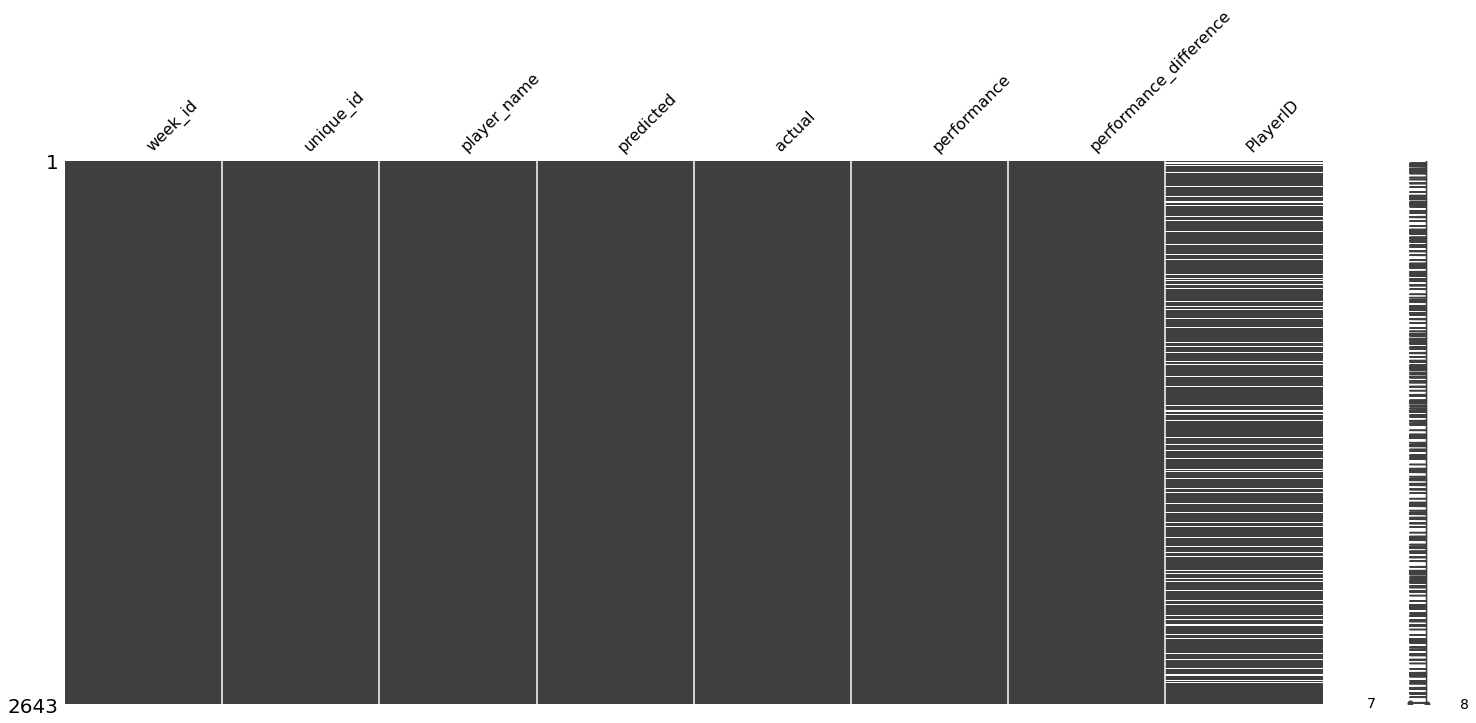

In [36]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

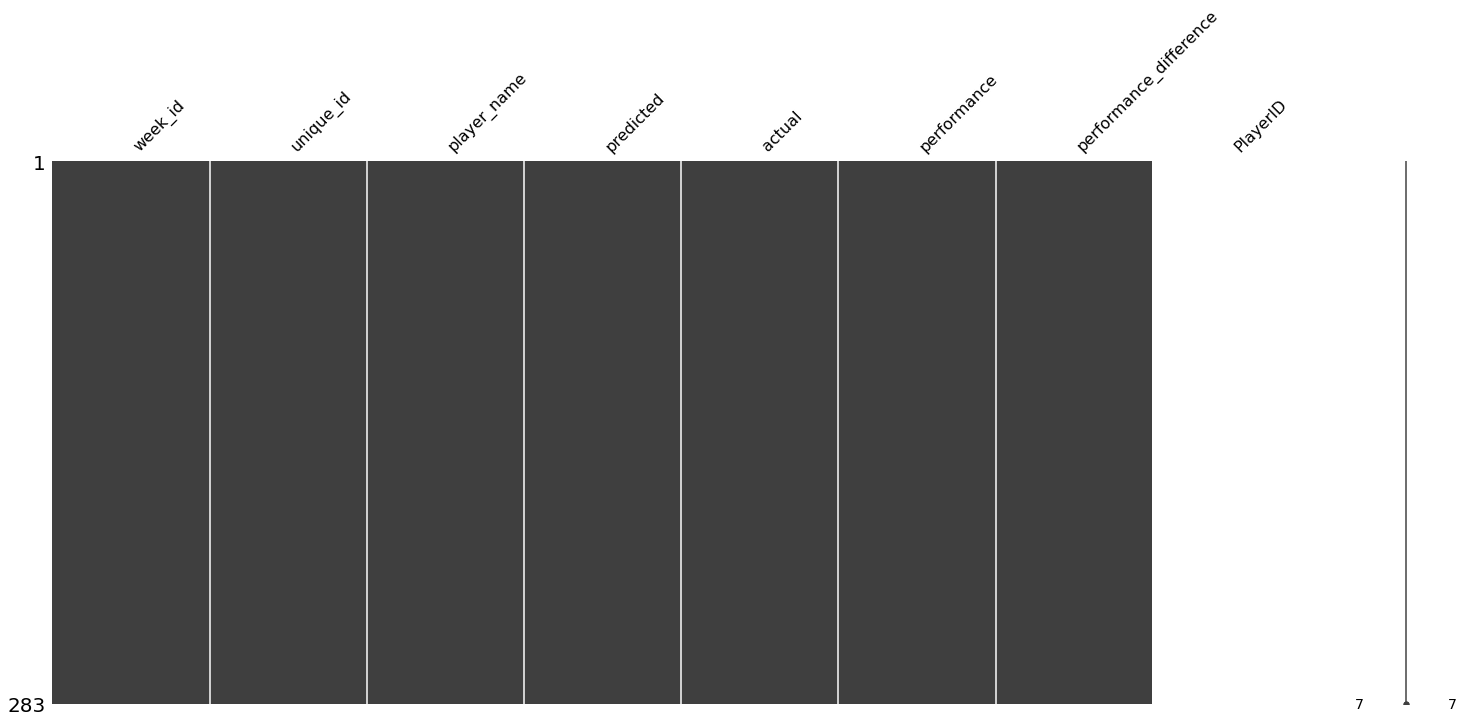

In [35]:
import missingno as msno
msno.matrix(null_names)

In [34]:
null_names = df[df['PlayerID'].isnull()]

In [55]:
names

,PlayerID,unique_id
0,14891,tommybohanon
1,22268,willsunderland
2,22276,demichaelharris
3,22277,cartero'donnell
4,17457,nickeaston
...,...,...
3923,19326,colehikutini
3924,19766,saquonbarkley
3925,21433,blakeblackmar
3926,21434,spencerschnell


In [49]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [57]:
#Casting the name column of both dataframes into lists
null_names_names = list(null_names['unique_id'].unique())
names_names = list(names['unique_id'].unique())

#Defining a function to return the match and similarity score of the fuzz.ratio() scorer. The function will take in a term(name), list of terms(list_names), and a minimum similarity score(min_score) to return the match. 
def match_names(name, list_names, min_score=0):
    max_score = -1
    max_name = ''
    for x in list_names:
        score = fuzz.ratio(name, x)
        if (score > min_score) & (score > max_score):
            max_name = x
            max_score = score
    return (max_name, max_score)

#For loop to create a list of tuples with the first value being the name from the second dataframe (name to replace) and the second value from the first dataframe (string replacing the name value). Then, casting the list of tuples as a dictionary. 
names_list = []
for x in null_names_names:
    match = match_names(x, names_names, 75)
    if match[1] >= 75:
        name = ('(' + str(x), str(match[0]) + ')')
        names_list.append(name)
name_dict = dict(names_list)
name_dict

null_names['unique_id'] = null_names['unique_id'].replace(name_dict)

<ipython-input-57-ae9f191fc9ea>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_names['unique_id'] = null_names['unique_id'].replace(name_dict)


In [59]:
names['unique_id'].unique()[0:50]

array(['tommybohanon', 'willsunderland', 'demichaelharris',
       "cartero'donnell", 'nickeaston', 'deyonsizer', 'jerryjeudy',
       'tyriecleveland', 'nateherbig', 'elijahholyfield',
       'sheldonrichardson', 'kameroncline', 'chriswilliams',
       'farrodgreen', 'k.j.hamler', 'albertokwuegbunam',
       'stanleyjean-baptiste', 'marcussmith', 'ryanyurachek', 'drewscott',
       'marvinjones jr.', 'lerenteemccray', 'caseydunn', 'r.j.prince',
       'brandonlinder', 'tylershatley', 'alejandrovillanueva',
       'jaylenwatkins', 'nickholley', 'mitchellschwartz', 'tyreejackson',
       'suaopeta', 'rosspierschbacher', 'kapronlewis-moore',
       'andrewnorwell', 'carloshyde', 'kylewilson', 'billywinn',
       'johnsimon', 'rickwagner', 'milessanders', 'calebwilson',
       'phillipdorsett ii', 'malcombrown', 'levantebellamy',
       'derrektuszka', 'lloydcushenberry iii', 'garrettdickerson',
       'jacksonporter', 'joshcrockett'], dtype=object)

In [61]:
df = pd.merge(df, names, how='left', on='unique_id')

<AxesSubplot:>

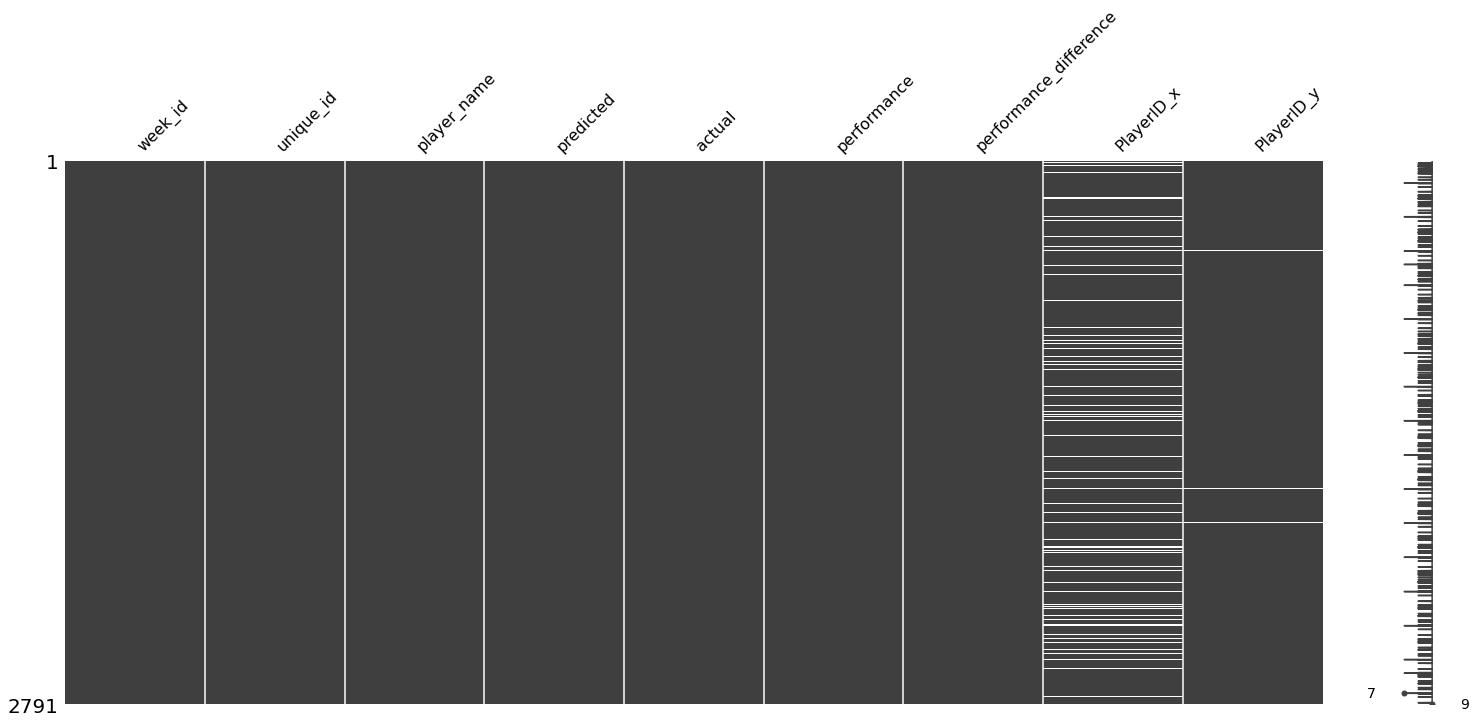

In [62]:
import missingno as msno
msno.matrix(df)

In [63]:
df = df.drop('PlayerID_x', axis = 1)

<AxesSubplot:>

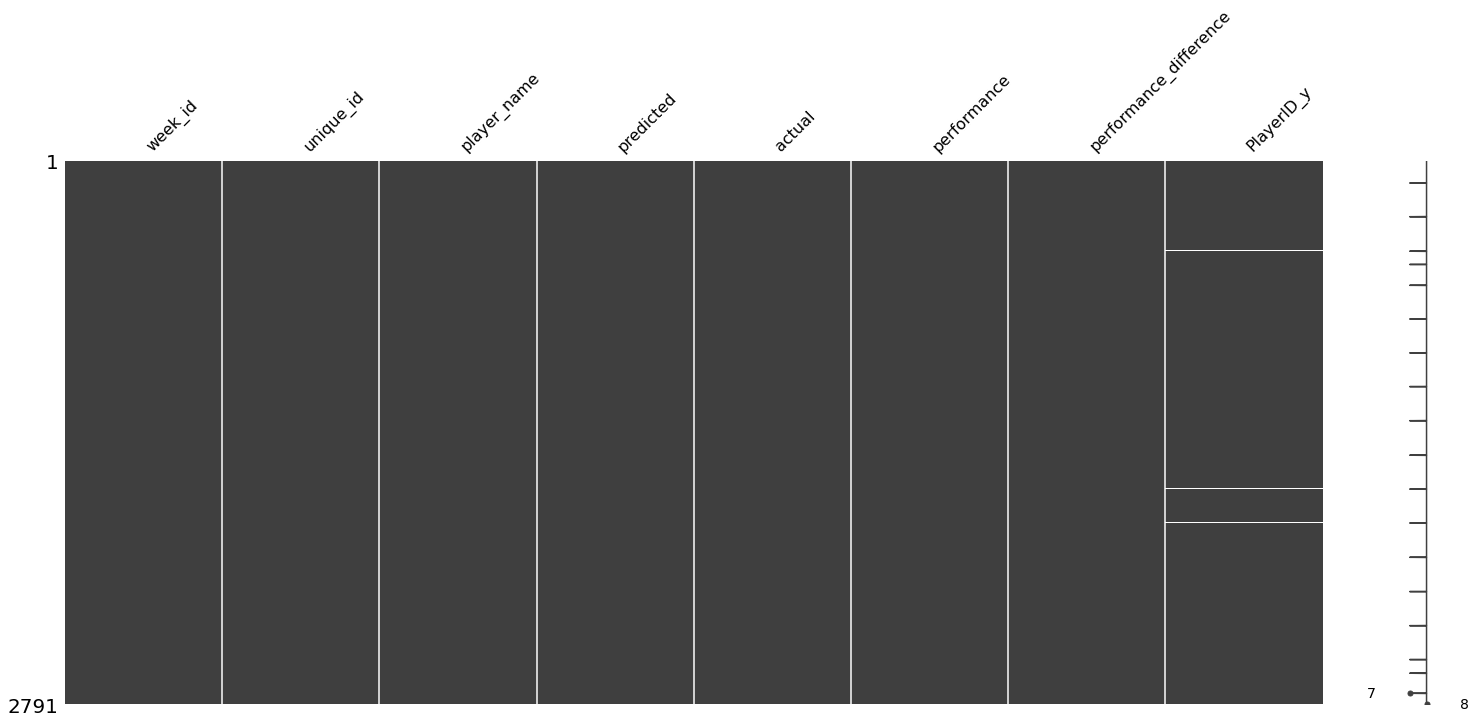

In [64]:
import missingno as msno
msno.matrix(df)

In [65]:
df = df.rename(columns = {'PlayerID_y':'PlayerID'})

In [12]:
names

,PlayerID,uniqueID
0,14891,tommybohanon
1,22268,willsunderland
2,22276,demichaelharris
3,22277,cartero'donnell
4,17457,nickeaston
...,...,...
3923,19326,colehikutini
3924,19766,saquonbarkley
3925,21433,blakeblackmar
3926,21434,spencerschnell


In [ ]:
names[names['unique_id']]

In [82]:
df[df['PlayerID'].isnull()]

,week_id,unique_id,player_name,predicted,actual,performance,performance_difference,PlayerID
114,2019_01,melvingordoniii,Melvin Gordon,0.000000,0.0,1,0.000000,NaN
287,2019_02,melvingordoniii,Melvin Gordon,0.000000,0.0,1,0.000000,NaN
464,2019_03,melvingordoniii,Melvin Gordon,0.000000,0.0,1,0.000000,NaN
532,2019_04,paulrichardsonjr,Paul Richardson Jr.,12.228222,4.4,1,-7.828222,NaN
639,2019_04,melvingordoniii,Melvin Gordon,6.227891,0.0,1,-6.227891,NaN
812,2019_05,melvingordoniii,Melvin Gordon,12.506400,7.8,1,-4.706400,NaN
986,2019_06,melvingordoniii,Melvin Gordon,16.331666,7.8,1,-8.531666,NaN
1159,2019_07,melvingordoniii,Melvin Gordon,14.326274,8.9,1,-5.426274,NaN
1334,2019_08,melvingordoniii,Melvin Gordon,13.645783,11.4,1,-2.245783,NaN
1511,2019_09,melvingordoniii,Melvin Gordon,12.337767,25.9,0,13.562233,NaN


In [75]:
for n in df['unique_id']:
    if n == 'melvingordon':
        n == 'melvingordoniii'
    else:
        pass

In [81]:
df.loc[df['unique_id'] == 'melvingordon', 'unique_id'] = 'melvingordoniii'

In [95]:
df = pd.merge(df, names, how='left', on='unique_id')

<AxesSubplot:>

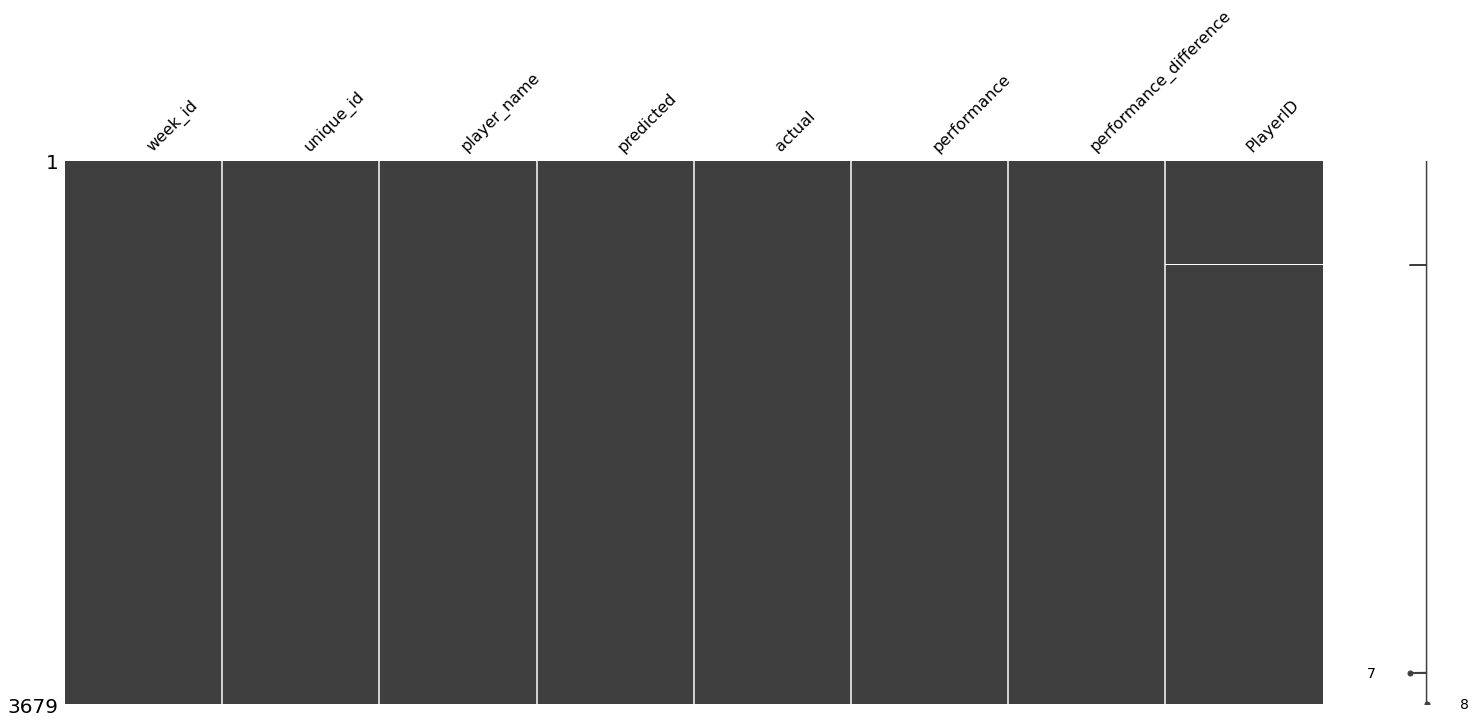

In [96]:
import missingno as msno
msno.matrix(df)

In [87]:
df = df.drop('PlayerID_x', axis = 1)

In [88]:
df = df.rename(columns = {'PlayerID_y':'PlayerID'})

In [94]:
df

,week_id,unique_id,player_name,predicted,actual,performance,performance_difference
0,2019_01,saquonbarkley,Saquon Barkley,23.115309,17.90,1,-5.215309
1,2019_01,alvinkamara,Alvin Kamara,21.168970,23.90,0,2.731030
2,2019_01,jameswhite,James White,13.946106,13.20,1,-0.746106
3,2019_01,tylerboyd,Tyler Boyd,14.135564,14.30,0,0.164436
4,2019_01,jaredgoff,Jared Goff,17.244130,9.44,1,-7.804130
...,...,...,...,...,...,...,...
3082,2019_16,austinekeler,Austin Ekeler,16.054582,11.90,1,-4.154582
3083,2019_16,terrymclaurin,Terry McLaurin,12.657177,15.60,0,2.942823
3084,2019_16,jameiswinston,Jameis Winston,19.503190,11.00,1,-8.503190
3085,2019_16,davidmontgomery,David Montgomery,11.467978,6.90,1,-4.567978


In [101]:
df = df.dropna()

In [102]:
df['PlayerID'] = [int(n) for n in df['PlayerID']]

<ipython-input-102-6bc887af6515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PlayerID'] = [int(n) for n in df['PlayerID']]


In [92]:
df = df.dropna(axis='columns')

In [70]:
names[names['unique_id'].str.contains('melvin')]

,PlayerID,unique_id
349,14128,melviningramiii
574,16776,melvingordoniii
2159,15359,rashaanmelvin


<AxesSubplot:>

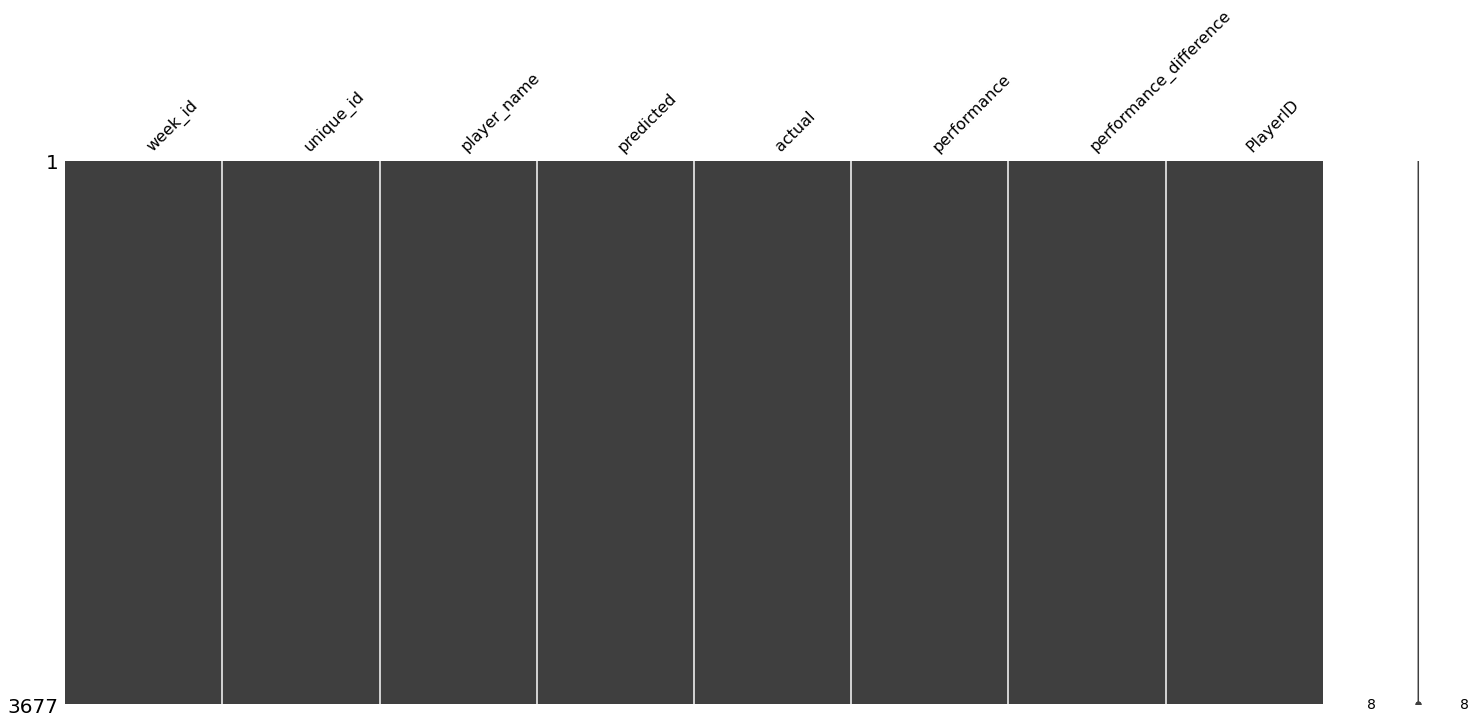

In [103]:
import missingno as msno
msno.matrix(df)

In [104]:
df[[
    'week_id',
    'unique_id',
    'player_name',
    'predicted',
    'actual',
    'performance',
    'performance_difference',
    'PlayerID'
]].to_sql(
    'performance',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',), ('stats_regular',), ('stats_red_zone',), ('elevation_and_conference',), ('performance',)]


In [ ]:
df = pd.read_csv('../../fixtures/cleaned_data/stadium_elevations.csv')
def create_connection(db_file):
    """ 
    create a database connection to the SQLite database
    specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = create_connection('../../fixtures/database/cloudy_with_a_chance_of_football.db')
df.to_sql(
    'elevation_and_conference',
    con = conn,
    index = False,
    if_exists = 'append'
)

cursorObj = conn.cursor()
cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())